<a href="https://www.kaggle.com/code/shellsquareganeshan/build-decision-tree-from-scratch?scriptVersionId=186647968" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# lets make decision tree for regression and classification from scratch

# DECISION TREE FOR CLASSIFICATION
**1.Start with the entire dataset:**
*     Assign the dataset to the root of the tree.
    
**2.Check for stopping criteria:**
* If all instances belong to the same class or if a stopping criterion (e.g., maximum depth, minimum samples per leaf) is met, create a leaf node with the majority class label.
    
**3.Find the best split:**
* For each feature, consider each unique value as a potential split point.
* Split the dataset into two subsets (left and right) based on the split point.
* Calculate the impurity (e.g., Gini impurity, Information Gain) for each split.
* Choose the split that results in the highest information gain or the lowest impurity.
    
**4.Create child nodes:**
* Divide the dataset into the left and right subsets based on the best split.
* Create left and right child nodes and assign the respective subsets to them.
    
**5.Repeat recursively:**
* Apply the same process to each child node, treating the subsets as new datasets.
    
**6.Return the tree:**
* The process continues recursively until the stopping criteria are met for all nodes.
* The result is a decision tree where each internal node represents a decision based on a feature, and each leaf node represents a class label.

**here we will be using gini impurity**

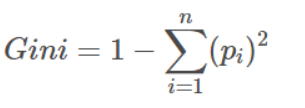

**For reference lets make a decision tree classifier from sklearn**

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target
model = DecisionTreeClassifier(max_depth = 3 , random_state = 42)
model.fit(X,y)
new_data = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(new_data)
print("prediction=",prediction) # predicted class 

prediction= [0]


**Build from scratch**

In [3]:
import numpy as np

In [4]:
# make sample dataset
X = [[2.771244718, 1.784783929],
         [1.728571309, 1.169761413],
         [3.678319846, 2.81281357],
         [3.961043357, 2.61995032],
         [2.999208922, 2.209014212],
         [7.497545867, 3.162953546],
         [9.00220326, 3.339047188],
         [7.444542326, 0.476683375],
         [10.12493903, 3.234550982],
         [6.642287351, 3.319983761]]

y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X=np.array(X)
X.shape

(10, 2)

In [5]:
num_of_samples_per_class={c:sum([1 for i in y if i == c]) for c in set(y)}
print(num_of_samples_per_class)

{0: 5, 1: 5}


In [6]:
class Node:
    def __init__(self,predicted_class, gini):
        self.predicted_class = predicted_class # predicted_class is the majority class label
        self.gini = gini
        self.feature_index = None
        self.threshold  = None
        self.left = None
        self.right = None
        

class CustomDecisionTreeClassifier:
    def __init__(self,max_depth):
        self.num_of_samples_per_class = None
        self.max_depth = max_depth
        self.tree = None
        
    def gini_impurity(self,y):
        counts = {c:sum([1 for i in y if i == c]) for c in set(y)} #returns value count of y
        impurity = 1
        total_len = len(y)
        for labels in counts:
            prob_of_label = counts[labels]/total_len
            impurity -= prob_of_label**2
        return impurity

    def split_dataset(self,X,y,feature_index, threshold):
        left_X,left_y,right_X,right_y =[],[],[],[]
        for i in range(len(X)): # iterate through each row
            if X[i][feature_index] <= threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])
        return left_X,left_y,right_X,right_y

    def find_best_split(self,X,y):
        best_gini = 1
        best_feature = None
        best_threshold = None
        n_features = len(X[0])
        for feature_index in range(n_features): # iterate through each feature
            thresholds = set([x[feature_index] for x in X])
            for threshold in thresholds:
                left_X,left_y,right_X,right_y = self.split_dataset(X,y,feature_index,threshold)
                if not left_y or not right_y:
                    continue

                gini_left = self.gini_impurity(left_y)
                gini_right = self.gini_impurity(right_y)

                total_len = len(left_y)+len(right_y)
    #             total gini is the weighted avg of gini of leaves.
                gini = (len(left_y)/total_len)*gini_left+(len(right_y)/total_len)*gini_right
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold
#                     print(f"----best_feature:{best_feature},best_threshold:{best_threshold}")
        return best_feature, best_threshold
        
    def grow_tree(self,X,y,depth=0):
        self.num_of_samples_per_class = {c:sum([1 for i in y if i == c]) for c in set(y)}
        predicted_class=max(self.num_of_samples_per_class, key=self.num_of_samples_per_class.get)
        node = Node(predicted_class, gini = self.gini_impurity(y))
        
        if depth <=self.max_depth:
            feature_index, threshold = self.find_best_split(X,y)
            if feature_index is not None:
                left_X,left_y,right_X,right_y = self.split_dataset(X,y,feature_index,threshold)
#                 print(f"left={left_X},{left_y},right={right_X},{right_y}")
                node.feature_index =feature_index
                node.threshold = threshold
                node.left = self.grow_tree(left_X,left_y,depth+1)
                node.right = self.grow_tree(right_X,right_y,depth+1)
        return node
    
    def fit(self,X,y):
        self.num_of_class = set(y)
        self.num_of_features = X.shape[1] # (no_of_rows,no_of_column)
        self.tree = self.grow_tree(X,y)
        
    def predict(self,inputs):
        node = self.tree
        while node.left:
            if inputs[node.feature_index]<=node.threshold:
                node = node.left
            else:
                node=node.right
        return node.predicted_class
        

In [7]:
# Build tree
a=CustomDecisionTreeClassifier(max_depth=3)
tree = a.fit(X,y)

In [8]:
# make sample predcition with X itself
y_pred =[]
for x in X: 
    y_pred.append(a.predict(x))
print("predicted=",y_pred)
print("actual=",y)

predicted= [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
actual= [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [9]:
X=iris.data
y=iris.target
a=CustomDecisionTreeClassifier(max_depth=3)
tree = a.fit(X,y)
# compare predcition with sklearn
print("prediction from custom model=",a.predict(new_data[0]))
print("prediction from sklearn=",prediction)

prediction from custom model= 0
prediction from sklearn= [0]


# DECISION TREE FOR REGRESSION
To modify the given decision tree code to work for regression problems, we need to make several changes:

* Change the impurity measure: Instead of using Gini impurity, use mean squared error (MSE) to measure the impurity of a node.
* Change the leaf value: Instead of predicting the class with the highest frequency, predict the mean value of the target variable in the leaf node.

In [10]:
# Sample data (modified for regression)
X = [[2.771244718, 1.784783929],
         [1.728571309, 1.169761413],
         [3.678319846, 2.81281357],
         [3.961043357, 2.61995032],
         [2.999208922, 2.209014212],
         [7.497545867, 3.162953546],
         [9.00220326, 3.339047188],
         [7.444542326, 0.476683375],
         [10.12493903, 3.234550982],
         [6.642287351, 3.319983761]]
X=np.array(X)
y = [1.5, 1.0, 3.7, 3.0, 2.1, 7.5, 8.9, 7.4, 9.0, 6.6]

In [11]:
class Node:
    def __init__(self,predicted_value, mse):
        self.predicted_value = predicted_value
        self.mse = mse
        self.feature_index = None
        self.threshold  = None
        self.left = None
        self.right = None
        

class CustomDecisionTreeRegressor:
    def __init__(self,max_depth):
        self.num_of_samples_per_class = None
        self.max_depth = max_depth
        self.tree = None
        
    def mean_square_error(self,y):
        mean_y = sum(y)/len(y)
        mse = sum((val-mean_y)**2 for val in y)/len(y)
        return mse

    def split_dataset(self,X,y,feature_index, threshold):
        left_X,left_y,right_X,right_y =[],[],[],[]
        for i in range(len(X)): # iterate through each row
            if X[i][feature_index] <= threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])
        return left_X,left_y,right_X,right_y

    def find_best_split(self,X,y):
        best_mse = float('inf')
        best_feature = None
        best_threshold = None
        n_features = len(X[0])
        for feature_index in range(n_features): # iterate through each feature
            thresholds = set([x[feature_index] for x in X])
            for threshold in thresholds:
                left_X,left_y,right_X,right_y = self.split_dataset(X,y,feature_index,threshold)
                if not left_y or not right_y:
                    continue

                mse_left = self.mean_square_error(left_y)
                mse_right = self.mean_square_error(right_y)

                mse= (len(left_y)*mse_left+len(right_y)*mse_right)/len(y)
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature_index
                    best_threshold = threshold
#                     print(f"----best_feature:{best_feature},best_threshold:{best_threshold}")
        return best_feature, best_threshold
        
    def grow_tree(self,X,y,depth=0):
        
        predicted_value = sum(y)/len(y)
        node = Node(predicted_value, mse = self.mean_square_error(y))
        
        if depth <self.max_depth:
            feature_index, threshold = self.find_best_split(X,y)
            if feature_index is not None:
                left_X,left_y,right_X,right_y = self.split_dataset(X,y,feature_index,threshold)
#                 print(f"left={left_X},{left_y},right={right_X},{right_y}")
                node.feature_index =feature_index
                node.threshold = threshold
                node.left = self.grow_tree(left_X,left_y,depth+1)
                node.right = self.grow_tree(right_X,right_y,depth+1)
        return node
    
    def fit(self,X,y):
        self.num_of_class = set(y)
        self.num_of_features = X.shape[1] # (no_of_rows,no_of_column)
        self.tree = self.grow_tree(X,y)
        
    def predict(self,inputs):
        node = self.tree
        while node.left:
            if inputs[node.feature_index]<=node.threshold:
                node = node.left
            else:
                node=node.right
        return node.predicted_value
        

In [12]:
# Build tree
a=CustomDecisionTreeRegressor(max_depth=4)
tree = a.fit(X,y)

In [13]:
# make sample predcition with X itself
y_pred =[]
for x in X: 
    y_pred.append(a.predict(x))
print("predicted=",y_pred)
print("actual=",y)

predicted= [1.5, 1.0, 3.7, 3.0, 2.1, 7.5, 8.9, 7.4, 9.0, 6.6]
actual= [1.5, 1.0, 3.7, 3.0, 2.1, 7.5, 8.9, 7.4, 9.0, 6.6]


**Compare with sklearn DecisionTreeRegressor**

In [14]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [15]:
# Load the dataset
diabetes = load_diabetes()

# Features and target
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train the Decision Tree Regressor
regr = DecisionTreeRegressor(max_depth=15, random_state=42)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [17]:
# Make predictions
y_pred_train = regr.predict([X_train[0]])
y_pred_test = regr.predict([X_test[0]])
y_pred_train,y_pred_test,y_train[0],y_test[0]

(array([144.]), array([190.]), 144.0, 219.0)

In [18]:
# Build tree
a=CustomDecisionTreeRegressor(max_depth=15)
tree = a.fit(X_train,y_train)

In [19]:
# Make predictions
y_pred_train = a.predict(X_train[0])
y_pred_test = a.predict(X_test[0])
y_pred_train,y_pred_test,y_train[0],y_test[0]

(144.0, 197.0, 144.0, 219.0)